# Python for data analysis
## A fun-filled tutorial on data munging, analysis, and visualization with Pandas

# But seriously, why Python?

 - An interpreted language with clean, readable, concise code

 - Multiplaform, and supports various programming paradigms

- An integrated pipeline for all phases of data collection, processing, and analysis

- An extensive standard library, plus massive repositories of packages for just about anything you can think of (with easy-to-use tools for managing them)

 - Open source, with a highly active development community

<img src="img/stackoverflow.png">

## And don't forget the Jupyter (née IPython)  notebook

 - Code and results in an integrated interface

 - Easily save and share ad-hoc analyses

 - Export in a variety of formats...

 - ...even as slides!

Click [here](https://jupyter.org/index.html) for the Jupyter homepage
<img src="img/jupyter.png">

### My suggestion for a Python distribution and package manager
<img src="img/anaconda.png">

## Let's get some data!

In [211]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.core.display import display

In [212]:
data = pd.read_table('mylistening.txt',header=None,
    names=['user_id','item_id','artist_id','timestamp'],parse_dates=['timestamp'])

### But there are lots of other ways to get data into Python...

### Read from a database

In [213]:
# import MySQLdb
# db=MySQLdb.connect(host,port,user,passwd,db='databaseName')
# cursor = db.cursor()
# cursor.execute("SELECT column_a, column_b,c olumn_c FROM some_table")
# result = cursor.fetchall()

### Scrape data from the web!


- roll your own with urllib2, BeautifulSoup, lxml, etc.
- lots of prebuilt, custom libraries for pulling data from APIs (e.g. PyLast, musicbrainzngs, ...)


### Use Mechanical Turk!


 - Boto (https://github.com/boto/boto)

# You have your dataframe. Now what?

## Basic operations:

In [214]:
# preview the data: 
data.head()

,user_id,item_id,artist_id,timestamp
0,5759068,41,1,2007-11-05 13:33:28
1,5759068,41,1,2009-03-29 20:18:48
2,5759068,41,1,2009-06-04 23:35:14
3,5759068,41,1,2010-02-06 03:51:20
4,5759068,41,1,2010-03-24 21:02:33


In [215]:
data.tail()

,user_id,item_id,artist_id,timestamp
58828,5759068,39064966,39064958,2010-03-29 18:07:03
58829,5759068,39064990,39064991,2007-12-31 14:00:14
58830,5759068,39065008,39065006,2012-11-24 23:56:02
58831,5759068,39065013,39065014,2007-07-25 19:24:11
58832,5759068,39065015,39065014,2007-08-09 04:01:52


In [216]:
# simple stats:
data.describe()

,user_id,item_id,artist_id
count,58833,58833.000000,58833.000000
mean,5759068,2250941.841738,191385.196165
std,0,6646153.662761,2126089.930947
min,5759068,15.000000,1.000000
25%,5759068,87753.000000,1211.000000
50%,5759068,239366.000000,2965.000000
75%,5759068,1120718.000000,13973.000000
max,5759068,39065044.000000,39065014.000000


In [217]:
# sorting
data = data.sort('timestamp',ascending=True)
data.head()

,user_id,item_id,artist_id,timestamp
10061,5759068,3623,405,2007-02-24 22:54:28
42885,5759068,74220,11337,2007-02-24 22:59:07
34972,5759068,64735,4536,2007-02-24 23:01:54
52132,5759068,2021815,42105,2007-02-25 01:55:39
30434,5759068,39064541,3014,2007-02-25 02:00:36


## Leveraging Numpy

In [218]:
# "vanilla" python

x = range(10)
print x

print x*3
print x+10

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


TypeError: can only concatenate list (not "int") to list

In [219]:
new1 = [i*3 for i in x]
print new1

new2 = [i+10 for i in x]
new2

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [220]:
x_arr = np.array(x)
display(x_arr)

display(x_arr*3)
display(x_arr+10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [221]:
print np.sin(x_arr)
print np.exp(x_arr)

print "Mean of array -> %s" % x_arr.mean()
print "Index of highest value in array -> %s" % x_arr.argmax()
print "Sum of array -> %s" % x_arr.sum()
print "Product of array -> %s" % x_arr.prod()


[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
[  1.00000000e+00   2.71828183e+00   7.38905610e+00   2.00855369e+01
   5.45981500e+01   1.48413159e+02   4.03428793e+02   1.09663316e+03
   2.98095799e+03   8.10308393e+03]
Mean of array -> 4.5
Index of highest value in array -> 9
Sum of array -> 45
Product of array -> 0


In [222]:
data.mean(axis=0) # axis=0: operate over rows
### note that these only operate on *numeric* columns

user_id      5759068.000000
item_id      2250941.841738
artist_id     191385.196165
dtype: float64

In [223]:
print data.sum(axis=1).head(15) # # axis=0: operate over columns


10061     5763096
42885     5844625
34972     5828339
52132     7822988
30434    44826623
19986     5778037
15221     6262042
37625     5913179
10294     5866792
31556     5852659
13577     5849756
27241     5809060
12008     6089487
48280     6051698
48996     5831800
dtype: int64


## Selecting and grouping data, and playing with columns...

In [224]:
# get a column:
data['artist_id'].head(10)

10061      405
42885    11337
34972     4536
52132    42105
30434     3014
19986     1996
15221     1328
37625     7432
10294      405
31556     3875
Name: artist_id, dtype: int64

In [225]:
# get rows matching a condition
data.loc[data['artist_id']==405].head(10)

,user_id,item_id,artist_id,timestamp
10061,5759068,3623,405,2007-02-24 22:54:28
10294,5759068,107319,405,2007-02-25 02:12:30
10429,5759068,168925,405,2007-02-25 04:41:51
10382,5759068,129362,405,2007-02-26 06:12:02
10184,5759068,49058,405,2007-02-28 04:00:49
10173,5759068,47925,405,2007-02-28 05:48:00
10514,5759068,337929,405,2007-03-01 06:02:02
10167,5759068,47901,405,2007-03-02 07:27:57
10224,5759068,91961,405,2007-03-02 08:32:49
10062,5759068,3623,405,2007-03-02 08:36:12


In [226]:
# SQL-style joins and other operations
artists = pd.read_table('tmp')
artists.head()

,artist_id,artist
0,1,slipknot
1,12,%c3%9cnloco
2,14,muse
3,18,earshot
4,35,drowning+pool


In [227]:
data = data.merge(artists,on='artist_id',how='left')
data.head()

,user_id,item_id,artist_id,timestamp,artist
0,5759068,3623,405,2007-02-24 22:54:28,queens+of+the+stone+age
1,5759068,74220,11337,2007-02-24 22:59:07,lupe+fiasco
2,5759068,64735,4536,2007-02-24 23:01:54,black+eyed+peas
3,5759068,2021815,42105,2007-02-25 01:55:39,aesop+rock
4,5759068,39064541,3014,2007-02-25 02:00:36,at+the+drive-in


In [228]:
# Drop column 
data = data.drop('user_id',axis=1)


In [229]:
# Group and aggregate!
# Groupby by artist, get number of observations for each
data.groupby('artist').count().tail(10)

,item_id,artist_id,timestamp
artist,,,
zero+7,8,8,8
zero+down,6,6,6
ziggy+marley,1,1,1
ziggy+marley+&+the+melody+makers,4,4,4
zlad!,6,6,6
zo%c3%a9,9,9,9
zoe,2,2,2
zomboy,3,3,3
zox,1,1,1


In [230]:
# convenience function for getting number of occurrences of each value in a column
data['artist'].value_counts().head(10)

sigur+r%c3%b3s              2370
radiohead                   1750
the+mars+volta              1477
nine+inch+nails             1417
mogwai                      1221
nick+cave+&+warren+ellis    1159
beirut                      1125
tool                        1055
muse                         888
ratatat                      839
dtype: int64

In [231]:
# two-level grouping
data.groupby(['artist','item_id']).count().tail(10)

artist_id  timestamp
artist   item_id                       
zo%c3%a9 1691584           1          1
         2983328           2          2
         37276281          1          1
         39065043          2          2
zoe      39065044          2          2
zomboy   380522            1          1
         855510            1          1
         1354925           1          1
zox      4123632           1          1
zurdok   1351103           5          5

In [232]:
# custom grouping function
def group_by_first_letter(artist_name):
    return artist_name[0] # first letter of names

# grouping functions operate on index, so set that first!
data.set_index('artist').groupby(group_by_first_letter).count().head(10)

,item_id,artist_id,timestamp
%,818,818,818
.,232,232,232
1,13,13,13
2,51,51,51
3,16,16,16
5,3,3,3
6,528,528,528
a,4624,4624,4624
b,2898,2898,2898
c,2412,2412,2412


# Let's try some more realistic examples...

### How much do I listen each month?

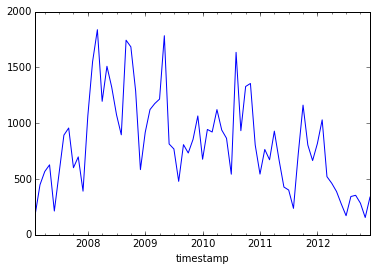

In [233]:
# new dataframe with timestamp set as the index 
time_indexed = data.set_index('timestamp')
# reasmple monthly (M), aggregate by count
time_indexed.resample('M',how='count')['artist'].plot()

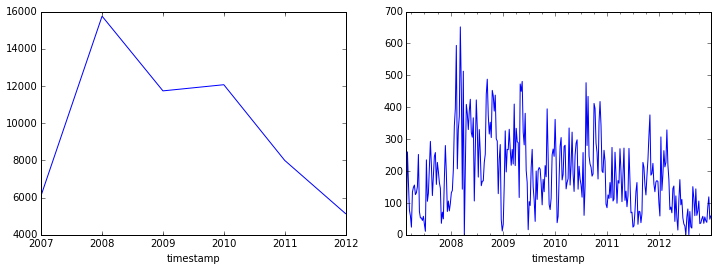

In [234]:
fix,axes = plt.subplots(1,2,figsize=(12,4))
# same as above, but with yearly (A) and weely (W) resampling
time_indexed.resample('A',how='count')['artist'].plot(ax=axes[0])
time_indexed.resample('W',how='count')['artist'].plot(ax=axes[1])

### Can we break it down by artist?

In [235]:
monthly_listens_by_artist = data.groupby(['artist','timestamp']).count()['item_id']
monthly_listens_by_artist.tail(25)

artist    timestamp          
zlad!     2007-07-31 00:43:48    1
          2007-10-26 16:49:01    1
          2008-03-02 13:05:52    1
          2008-03-12 17:31:00    1
          2008-03-14 09:08:54    1
zo%c3%a9  2008-01-02 17:30:35    1
          2008-01-02 17:35:21    1
          2008-01-02 17:40:11    1
          2008-02-18 00:08:55    1
          2008-07-14 19:19:28    1
          2008-08-28 05:52:51    1
          2009-02-13 00:11:48    1
          2009-03-05 05:49:31    1
          2009-10-13 08:50:00    1
zoe       2008-07-08 05:18:54    1
          2008-08-20 01:34:02    1
zomboy    2012-06-04 22:55:37    1
          2012-06-08 23:32:59    1
          2012-12-04 23:34:50    1
zox       2009-02-10 00:00:15    1
zurdok    2008-01-19 23:00:32    1
          2008-01-30 13:15:51    1
          2008-02-03 14:50:28    1
          2008-04-28 07:41:57    1
          2009-06-12 20:13:36    1
Name: item_id, dtype: int64

In [236]:
monthly_listens_by_artist = monthly_listens_by_artist.unstack()
monthly_listens_by_artist.tail(10)

timestamp,2007-02-24 22:54:28,2007-02-24 22:59:07,2007-02-24 23:01:54,2007-02-25 01:55:39,2007-02-25 02:00:36,2007-02-25 02:03:25,2007-02-25 02:05:00,2007-02-25 02:09:16,2007-02-25 02:12:30,2007-02-25 02:15:22,...,2012-12-28 17:12:03,2012-12-28 17:19:03,2012-12-29 21:55:51,2012-12-29 21:59:43,2012-12-29 22:03:41,2012-12-29 22:06:38,2012-12-29 22:09:57,2012-12-29 22:13:33,2012-12-29 22:16:42,2012-12-29 22:20:38
artist,,,,,,,,,,,,,,,,,,,,,
zero+7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero+down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ziggy+marley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ziggy+marley+&+the+melody+makers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zlad!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zo%c3%a9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zomboy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
# just a sanity check: if we sum over columns we see the whole DF isn't just NAs
monthly_listens_by_artist.sum(axis=1).tail(10)

artist
zero+7                              8
zero+down                           6
ziggy+marley                        1
ziggy+marley+&+the+melody+makers    4
zlad!                               6
zo%c3%a9                            9
zoe                                 2
zomboy                              3
zox                                 1
zurdok                              5
dtype: float64

In [238]:
# get top 5 most listened artists overall
top_artists = data['artist'].value_counts()[:5]
top_artists

sigur+r%c3%b3s     2370
radiohead          1750
the+mars+volta     1477
nine+inch+nails    1417
mogwai             1221
dtype: int64

In [239]:
monthly_listens_by_artist.reindex(top_artists.index)

timestamp,2007-02-24 22:54:28,2007-02-24 22:59:07,2007-02-24 23:01:54,2007-02-25 01:55:39,2007-02-25 02:00:36,2007-02-25 02:03:25,2007-02-25 02:05:00,2007-02-25 02:09:16,2007-02-25 02:12:30,2007-02-25 02:15:22,...,2012-12-28 17:12:03,2012-12-28 17:19:03,2012-12-29 21:55:51,2012-12-29 21:59:43,2012-12-29 22:03:41,2012-12-29 22:06:38,2012-12-29 22:09:57,2012-12-29 22:13:33,2012-12-29 22:16:42,2012-12-29 22:20:38
sigur+r%c3%b3s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radiohead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the+mars+volta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nine+inch+nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mogwai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
monthly_listens_by_artist.reindex(top_artists.index).fillna(0)

timestamp,2007-02-24 22:54:28,2007-02-24 22:59:07,2007-02-24 23:01:54,2007-02-25 01:55:39,2007-02-25 02:00:36,2007-02-25 02:03:25,2007-02-25 02:05:00,2007-02-25 02:09:16,2007-02-25 02:12:30,2007-02-25 02:15:22,...,2012-12-28 17:12:03,2012-12-28 17:19:03,2012-12-29 21:55:51,2012-12-29 21:59:43,2012-12-29 22:03:41,2012-12-29 22:06:38,2012-12-29 22:09:57,2012-12-29 22:13:33,2012-12-29 22:16:42,2012-12-29 22:20:38
sigur+r%c3%b3s,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
radiohead,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the+mars+volta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nine+inch+nails,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mogwai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
# .T = transpose
monthly_listens_by_artist.reindex(top_artists.index).fillna(0).T.head(10)

,sigur+r%c3%b3s,radiohead,the+mars+volta,nine+inch+nails,mogwai
timestamp,,,,,
2007-02-24 22:54:28,0,0,0,0,0
2007-02-24 22:59:07,0,0,0,0,0
2007-02-24 23:01:54,0,0,0,0,0
2007-02-25 01:55:39,0,0,0,0,0
2007-02-25 02:00:36,0,0,0,0,0
2007-02-25 02:03:25,0,0,0,0,0
2007-02-25 02:05:00,0,0,0,0,0
2007-02-25 02:09:16,0,0,0,0,0
2007-02-25 02:12:30,0,0,0,0,0


In [242]:
to_plot = monthly_listens_by_artist.reindex(top_artists.index).fillna(0).T.resample('M',how='sum')
to_plot.head()

,sigur+r%c3%b3s,radiohead,the+mars+volta,nine+inch+nails,mogwai
timestamp,,,,,
2007-02-28,1,3,16,0,2
2007-03-31,0,22,2,1,13
2007-04-30,1,48,2,24,11
2007-05-31,2,14,1,61,25
2007-06-30,1,43,3,6,1


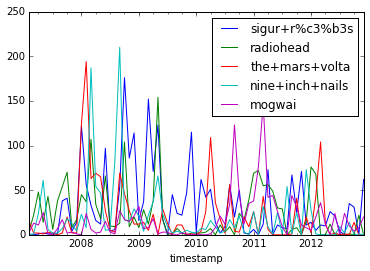

In [243]:
to_plot.plot()

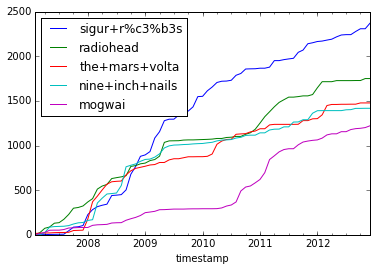

In [244]:
to_plot.cumsum().plot()

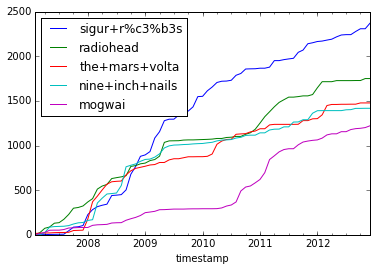

In [264]:
# I could have done this whole example in one line of code! (minus calculating the top artists)
data.groupby(['artist','timestamp']).count()['item_id'].unstack().reindex(top_artists.index).fillna(0).T.resample('M',how='sum').cumsum().plot()

## But does Python do stats?

In [246]:
import scipy.stats as stats
import statsmodels

In [247]:
# create 'subject' column, randomly selecting from integers from 0 to 19 (20 unique "subjects")
data['subject'] = np.random.random_integers(0,19,len(data))
# create 'measurement' column, randomly generating float values between 0 and 1, scaled by random integers
data['measurement'] = np.random.random(len(data)) * np.random.random_integers(0,2,len(data))
# create 'condition' column, setting even-numbered subject to a and odds to b
data['condition'] = data['subject'].apply(lambda x: 'a' if x%2==0 else 'b')
data.head()

,item_id,artist_id,timestamp,artist,subject,measurement,condition
0,3623,405,2007-02-24 22:54:28,queens+of+the+stone+age,1,0.000000,b
1,74220,11337,2007-02-24 22:59:07,lupe+fiasco,3,0.000000,b
2,64735,4536,2007-02-24 23:01:54,black+eyed+peas,10,0.514231,a
3,2021815,42105,2007-02-25 01:55:39,aesop+rock,16,0.566604,a
4,39064541,3014,2007-02-25 02:00:36,at+the+drive-in,6,0.333334,a


In [248]:
# A simple group comparison
grpa =  data[data['condition']=='a']['measurement']
grpb =  data[data['condition']=='b']['measurement']

print 'Group A'
print  grpa.describe()
print 'Group B'
print  grpb.describe()

stats.ttest_ind(grpa,grpb)

Group A
count    29279.000000
mean         0.497440
std          0.554440
min          0.000000
25%          0.000000
50%          0.324998
75%          0.833934
max          1.999867
Name: measurement, dtype: float64
Group B
count    29554.000000
mean         0.497626
std          0.552147
min          0.000000
25%          0.000000
50%          0.328593
75%          0.830992
max          1.999889
Name: measurement, dtype: float64


Ttest_indResult(statistic=-0.040816874678717988, pvalue=0.9674420250287068)

In [249]:
# create column 'some_IV', randomly choosing one of x, y, or z for each row
data['some_IV'] = np.random.choice(['x','y','z'],len(data))
data.head()

,item_id,artist_id,timestamp,artist,subject,measurement,condition,some_IV
0,3623,405,2007-02-24 22:54:28,queens+of+the+stone+age,1,0.000000,b,x
1,74220,11337,2007-02-24 22:59:07,lupe+fiasco,3,0.000000,b,x
2,64735,4536,2007-02-24 23:01:54,black+eyed+peas,10,0.514231,a,x
3,2021815,42105,2007-02-25 01:55:39,aesop+rock,16,0.566604,a,x
4,39064541,3014,2007-02-25 02:00:36,at+the+drive-in,6,0.333334,a,x


In [250]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# standard, R-style model specification
model=ols('measurement ~ C(condition) + C(some_IV) + C(condition):C(some_IV)', data=data).fit() 
print anova_lm(model)

                            df        sum_sq   mean_sq         F    PR(>F)
C(condition)                 1      0.000510  0.000510  0.001666  0.967442
C(some_IV)                   2      1.259016  0.629508  2.056365  0.127927
C(condition):C(some_IV)      2      0.106267  0.053134  0.173568  0.840661
Residual                 58827  18008.508953  0.306127       NaN       NaN


# Visualization

## Matplotlib and pandas

In [251]:
from matplotlib import pyplot as plt
%matplotlib inline

example = pd.DataFrame({'a':np.random.random(10),'b':np.random.random(10),'c':np.random.random(10)})
example.head()

,a,b,c
0,0.868017,0.887874,0.834906
1,0.804034,0.779100,0.267683
2,0.058655,0.090207,0.664040
3,0.262684,0.607887,0.716267
4,0.266576,0.927632,0.754363


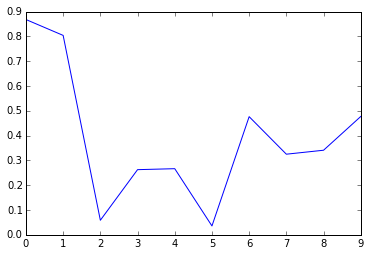

In [252]:
plt.plot(example['a'])

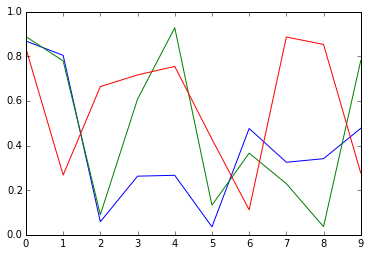

In [253]:
fig,ax = plt.subplots(1,1)
for column in ['a','b','c']:
    ax.plot(example[column])

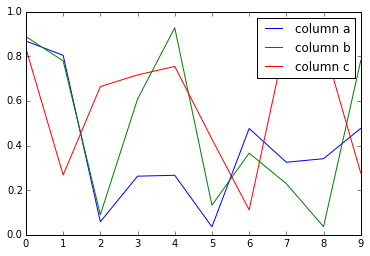

In [254]:
fig,ax = plt.subplots(1,1)
for column in ['a','b','c']:
    # to make a legend, each line must have a label!
    ax.plot(example[column],label='column '+column)
ax.legend()

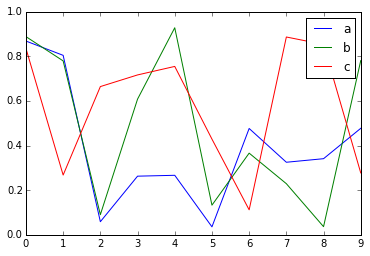

In [255]:
# Pandas does all of the above automatically
example.plot()

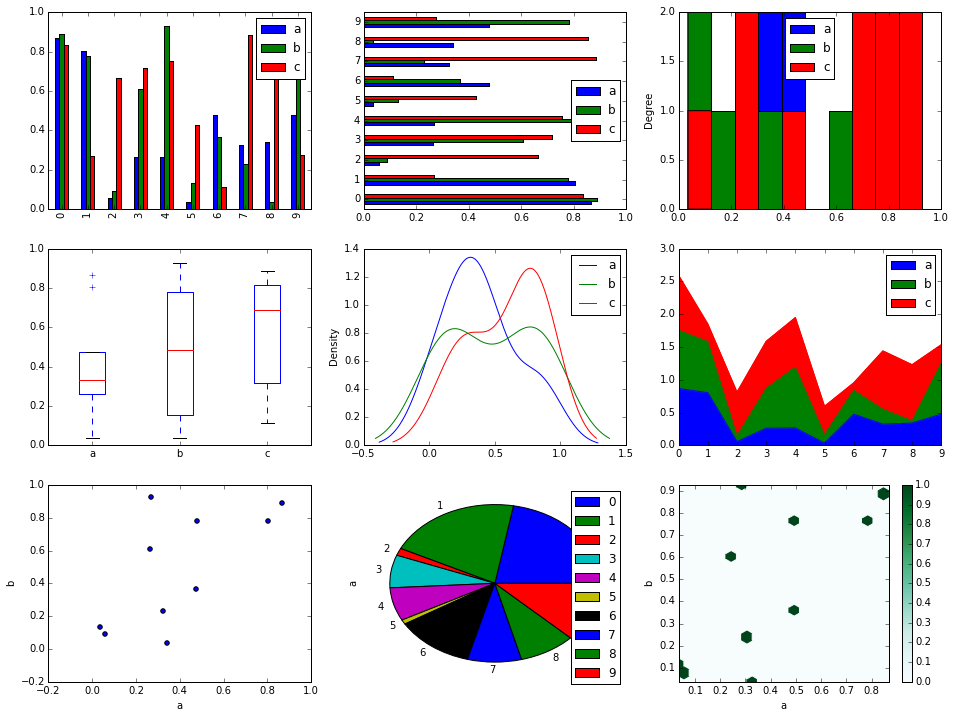

In [256]:
fix,axes = plt.subplots(3,3,figsize=(16,12))

# this creates a simple flat iterator over the the axes. Which just means we can get the next one with 
# ax_iter.next() (instead of keeping track of which row/column we're on)
ax_iter = axes.flat 

example.plot(kind='bar',ax=ax_iter.next())
example.plot(kind='barh',ax=ax_iter.next()) 
example.plot(kind='hist',ax=ax_iter.next())
example.plot(kind='box',ax=ax_iter.next())
example.plot(kind='density',ax=ax_iter.next())
example.plot(kind='area',ax=ax_iter.next())
example.plot(kind='scatter',x='a',y='b',ax=ax_iter.next())
example.plot(kind='pie',y='a',ax=ax_iter.next())
example.plot(kind='hexbin',x='a',y='b',gridsize=20,ax=ax_iter.next())

##### See http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [257]:
example = data[['condition','some_IV','measurement']]
example.head()

,condition,some_IV,measurement
0,b,x,0.000000
1,b,x,0.000000
2,a,x,0.514231
3,a,x,0.566604
4,a,x,0.333334


In [258]:
grouped = example.groupby(['condition','some_IV'])
avg = grouped.mean()
avg

measurement
condition some_IV             
a         x           0.491279
          y           0.504302
          z           0.496631
b         x           0.491617
          y           0.501109
          z           0.499997

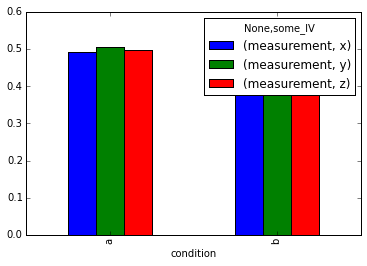

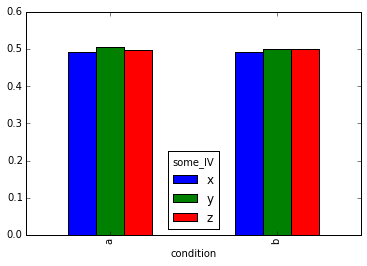

In [259]:
avg.unstack().plot(kind='bar')
avg.unstack()['measurement'].plot(kind='bar')

In [260]:
SE = grouped.apply(lambda x: np.std(x)/np.sqrt(len(x)))
SE

measurement
condition some_IV             
a         x           0.005553
          y           0.005648
          z           0.005633
b         x           0.005604
          y           0.005536
          z           0.005549

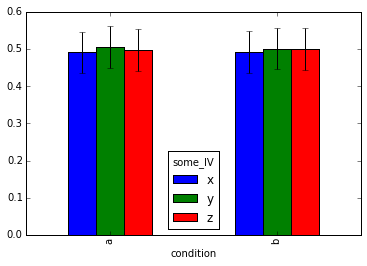

In [261]:
avg.unstack()['measurement'].plot(kind='bar',yerr=10*SE.unstack()['measurement'])

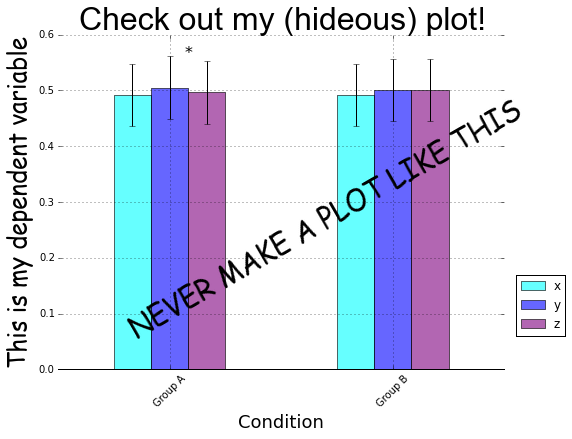

In [269]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
# note use of "color" argument
avg.unstack()['measurement'].plot(kind='bar',yerr=10*SE.unstack()['measurement'],ax=ax,legend=None,color=['cyan','blue','purple'],alpha=0.6)
# manually place the legend, and specify its position
ax.legend(bbox_to_anchor=(1.15,0.3))
ax.set_ylabel('This is my dependent variable',fontdict={'fontname':'Comic Sans MS','fontsize':24})
ax.set_title('Check out my (hideous) plot!',fontdict={'fontname':'Arial','fontsize':32})
# manually specify xtick locations and labels
plt.xticks([0,1],['Group A','Group B'],rotation=45)
ax.set_xlabel('Condition',fontsize=18)
ax.grid()

ax.annotate("*",(0.07,0.56),fontsize=16)

ax.annotate("NEVER MAKE A PLOT LIKE THIS",(-0.2,0.45),fontsize=28,rotation=30,fontname='Comic Sans MS')

# remove some of the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


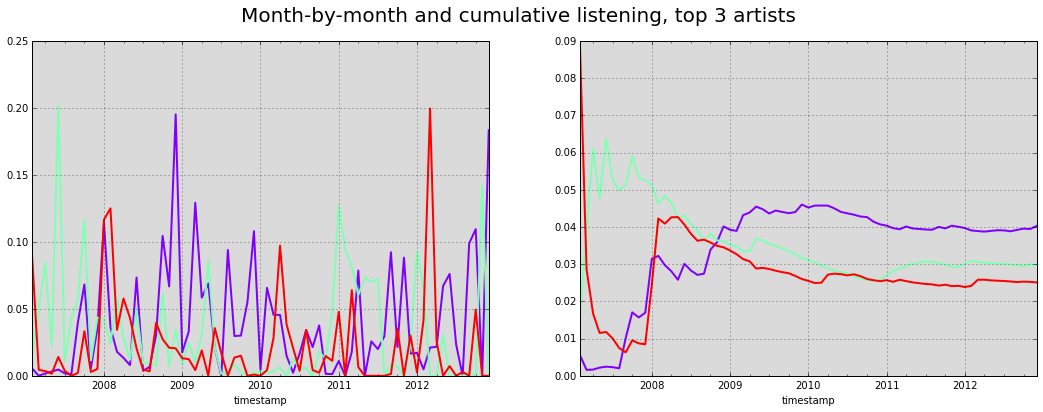

In [263]:
# this is very similar to the command we used earlier to get the listening for the top 5 artists 
# (but here we're just getting the top 3)
plot_data = data.groupby(['artist','timestamp']).count()['item_id'].unstack().reindex(top_artists.index[:3]).fillna(0).T.resample('M',how='sum')

# calculate total number of listens (across all artists) for each month, for normalization purposes
total_monthly_playcounts = time_indexed.resample('M',how='count')['item_id']

# 1 row x 2 column plot
fig,axes = plt.subplots(1,2,figsize = (18,6))

# normalize data, then plot, note use of colormap
plot_data.divide(total_monthly_playcounts,axis=0).plot(ax=axes[0],grid=True,legend=False,lw=2,colormap='rainbow')
ax.set_ylabel('Monthly proportion of listening')

# normalized *cumulative* and plot
plot_data.cumsum().divide(total_monthly_playcounts.cumsum(),axis=0).plot(ax=axes[1],grid=True,legend=False,lw=2,colormap='rainbow')
ax.set_ylabel('Cumulative monthly proportion of listening')

# manually create legend
leg = ax.legend()

# do some manual reformatting of all our legend text
from urllib import unquote_plus
text = leg.get_texts()
for t in text:
    t.set_text(unquote_plus(t.get_text().encode('ascii')).decode('utf8').title())
    
# when we want to do the same sort of transformation to all axes, we can do so with a simple for loop
for ax in axes:
    ax.set_axis_bgcolor('#DADADA') # set background color
    #ax.set_ylim(0,0.22)

# set an overall figure title
fig.suptitle('Month-by-month and cumulative listening, top 3 artists',fontsize=20)



# Digging deeper

### This was just the tip of the iceberg

 - there are *tons* of specially designed packages to learn about and work with

 - And of course, you can always build your own!

 - working with bigger data? Try Graphlab (or maybe even Apache Spark)

# Want to get started using these tools for your research? 

### Feel free to ask me for help (follow up presentation next semester?)
### Check out the resources on the next slide.

#### Resources

 - Working with Notebooks:
     - [Jupyter documentation](https://jupyter-notebook.readthedocs.org/en/latest/)
     - [A gallery of interesting notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#general-topics-in-scientific-computing)
     - [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) (for pretty text formatting)
     
     
 - Plotting:
     - [Creating publication-quality figures with Matplotlib](https://github.com/jbmouret/matplotlib_for_papers)
     - [Pandas plotting documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
     - [Pyplot documentation](http://matplotlib.org/api/pyplot_api.html)
     - [Matplotlib colormaps](http://matplotlib.org/examples/color/colormaps_reference.html)
     - [HTML color picker](http://www.w3schools.com/tags/ref_colorpicker.asp)
     

 - Statistics:
    - [A general tutorial on stats in Python](https://github.com/thomas-haslwanter/statsintro)
    - [StatsModels documentation](http://statsmodels.sourceforge.net/devel/index.html)
    
    
 - Books:
     - [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython](http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793/ref=sr_1_1?ie=UTF8&qid=1445436918&sr=8-1&keywords=wes+mckinney) (By Wes McKinney, creator of Pandas!)
     - [A general introduction to Python](http://www.amazon.com/Learning-Python-5th-Mark-Lutz/dp/1449355730/ref=sr_1_1?ie=UTF8&qid=1445437160&sr=8-1&keywords=python)
     
     
 - Graphlab
     - [Documentation](https://dato.com/products/create/docs/)
     - [Translator](https://dato.com/learn/translator/) (to help you transition from Pandas/R to Graphlab)
     

 - Misc.
      - [Python for psychologists](https://computingforpsychologists.wordpress.com/2013/10/17/some-python-resources/)
      - [Sublime Text](https://www.sublimetext.com/) (When you need to code outside of a notebook, this is hands down the best editor out there)
      - [Anaconda](https://www.continuum.io/why-anaconda) (my recommendation for a Python distribution and package manager)
      - [IPython, the awesome interactive interpreter](https://ipython.org/)
